# BINARY CLASSIFICATION ALGORITHMS USED IN ADULT INCOME DATASET

In [1]:
#importing dependencies
import pandas as pd
import os


In [2]:
df= pd.read_csv('../Resources/adult.csv')
df.head()

,,,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_1= df.rename({'age':'education','workclass':'age','education':'marital-status','marital-status':'job',
                'occcupation':'relationship','relationship':'race', 'race':'sex','sex':'capital-gain',
                 'capital-gain':'capital-loss','capital-loss':'hours-per-week','hours-per-week':'native-country',
                 'native-country':'the_label'},axis=1, )
df_1.head()

,,,education,age,marital-status,job,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,the_label
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_2=df_1.reset_index()
df_3= df_2.rename(columns={'level_0':'age','level_1':'workclass','level_2':'fnlwgt','age':'education-num', 'occupation':'relationship'})
df_3.head()

,age,workclass,fnlwgt,education,education-num,marital-status,job,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,the_label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_3.to_csv('../Resources_2/cleaned_adults.csv')

In [6]:
df_3.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [102]:
df_3['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

## Drawing Inferences and Understanding the Dataset

In [86]:
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [87]:
df_3['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [88]:
age = df_3['age'].unique()
age_entries = df_3['age'].value_counts()

Text(0.5, 1.0, 'Age Distribution of Dataset')

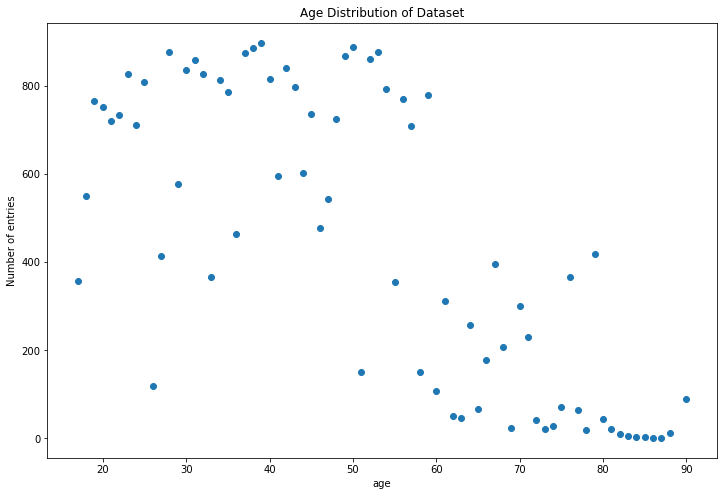

In [101]:
plt.figure(figsize=(12,8))
fig =plt.scatter(x=age, y=age_entries)
plt.xlabel('age')
plt.ylabel('Number of entries')
plt.title('Age Distribution of Dataset')

In [81]:
categorical_features = []

In [82]:
for column in df_3.columns:
    if df_3[column].dtypes == 'object':
        categorical_features.append(column)
print(categorical_features)

['workclass', 'education', 'marital-status', 'job', 'relationship', 'race', 'sex', 'native-country', 'the_label']


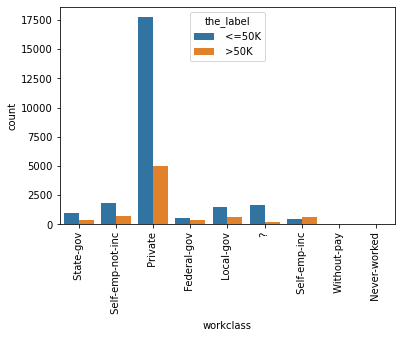

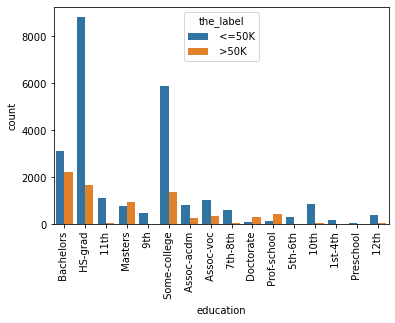

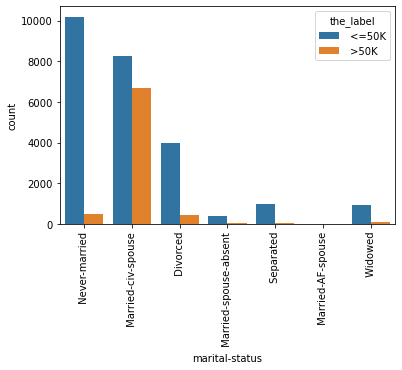

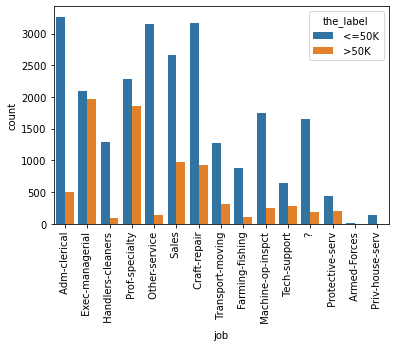

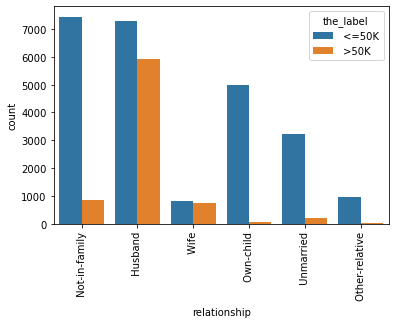

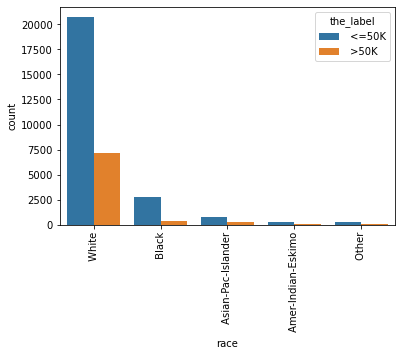

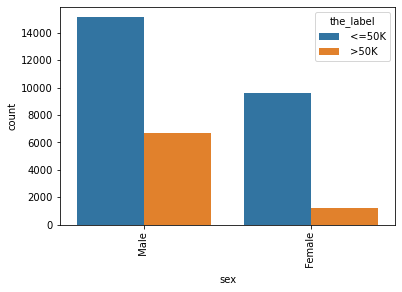

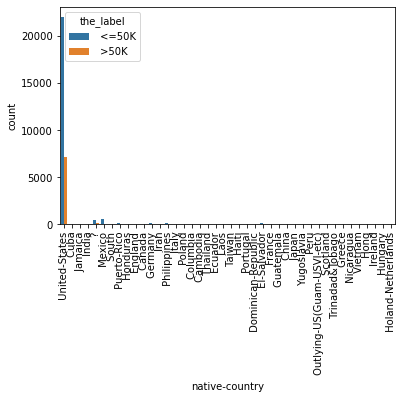

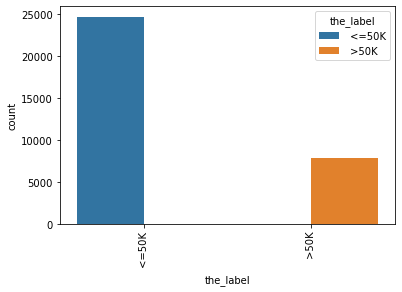

In [83]:
for i in df_3[categorical_features]:
    plt.figure(i)
    sns.countplot(x=i, hue=df_3['the_label'], data=df_3).tick_params(axis='x', rotation=90)

In [7]:
#checking for null values
df_3.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
job               0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
the_label         0
dtype: int64

In [8]:
#importing linear regresson models
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [9]:
#select attributes to be used for training and seperate dependent and independent variables
x= df_3.drop(columns=['fnlwgt','the_label','workclass','native-country'])
y= df_3['the_label']


In [10]:
y.tail()

32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: the_label, dtype: object

In [11]:
#using one-hot encoding to work on independent variables
enc_1=pd.get_dummies(x[['education','marital-status','job','relationship','race','sex']])
X= x.merge(enc_1, right_index=True,left_index=True)
X= X.drop(columns=['education','marital-status','job','relationship','race','sex'])
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,0,0,40,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [12]:
#replacing >50K with a 1 and <=50K with a 0
def replace_with_binary(variable):
    if variable.split(" ")[-1] == '<=50K':
        variable = 0
    elif variable.split(" ")[-1] == '>50K':
        variable = 1
    return variable

In [13]:
Y = y.map(lambda y: replace_with_binary(y)) 
Y.tail()

32556    0
32557    1
32558    0
32559    0
32560    1
Name: the_label, dtype: int64

In [14]:
Y.value_counts()

0    24720
1     7841
Name: the_label, dtype: int64

In [15]:
#splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

## Using Linear regression

In [97]:
#creating the LinearRegression module and fitting in the data
model=LinearRegression()
#fitting the model into the dataset
model.fit(X_train,Y_train)

LinearRegression()

In [98]:
model.score(X_test,Y_test)

0.3650185705232064

In [99]:
Y_pred = model.predict(X_test)
model.score(X_train,Y_train)

0.36304193014436126

In [19]:
import matplotlib.pyplot as plt

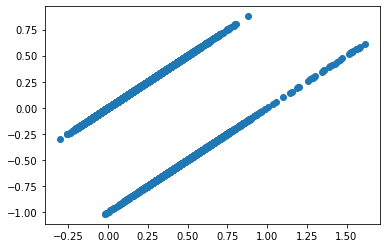

In [20]:
plt.scatter(Y_pred, Y_pred-Y_test)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Using Decision Tree Classifier (gini criterion)

In [22]:
#data classification using the Decision tree classifier using the gini method
clf_data = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth=3, min_samples_leaf=5, class_weight = 'balanced')
clf_data.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [23]:
Y_pred = clf_data.predict(X_test)

In [24]:
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.8203592814371258
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4942
           1       0.61      0.70      0.65      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.78      0.77      6513
weighted avg       0.83      0.82      0.82      6513



In [25]:
pd.DataFrame(
    dict(Features=X.columns, Importance=clf_data.feature_importances_),
    index=range(len(clf_data.feature_importances_))
).sort_values('Importance', ascending=False).set_index('Features')

,Importance
Features,
marital-status_ Married-civ-spouse,0.658874
education-num,0.178572
capital-gain,0.162554
job_ Transport-moving,0.000000
job_ Craft-repair,0.000000
job_ Exec-managerial,0.000000
job_ Farming-fishing,0.000000
job_ Handlers-cleaners,0.000000
job_ Machine-op-inspct,0.000000


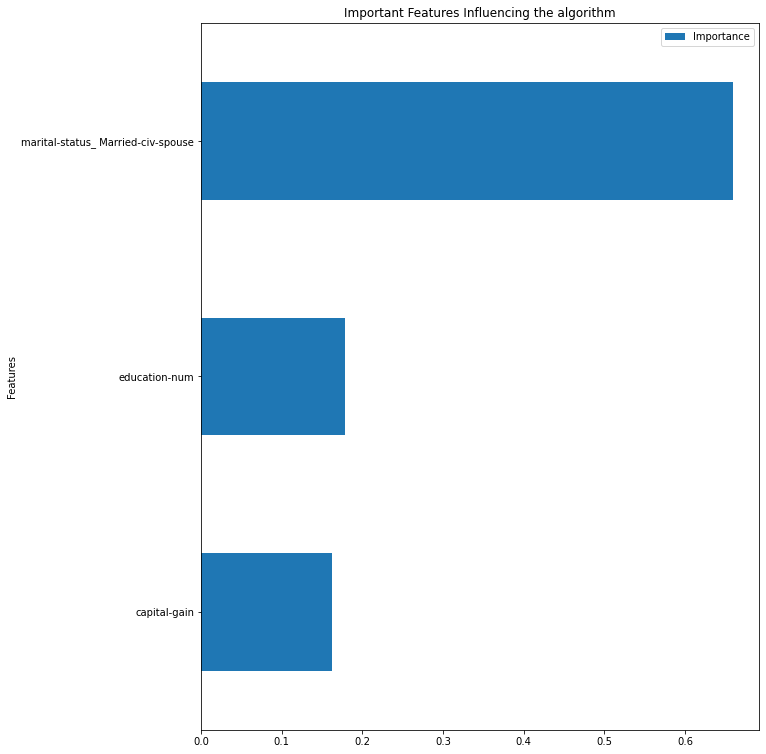

In [27]:
plot_df_1 = pd.DataFrame(
    dict(Features=X.columns, Importance=clf_data.feature_importances_),
    index=range(len(clf_data.feature_importances_))
).sort_values('Importance', ascending=True).set_index('Features')

plot_df_1[plot_df_1.values > 0].plot(kind='barh', figsize=(10,13), title='Important Features Influencing the algorithm');

## Using Decision Tree Classifier (entropy criterion)

In [31]:
#using the Decision Tree  Classifier for entropy
clf_data_2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=3, min_samples_leaf=5, class_weight = 'balanced')
clf_data_2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=100)

In [32]:
Y_pred_1 = clf_data_2.predict(X_test)

In [33]:
#finding the model accuracy
print(accuracy_score(Y_test,Y_pred_1))

0.7191770305542761


In [34]:
#getting the classification report
print(classification_report(Y_test,Y_pred_1))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      4942
           1       0.46      0.88      0.60      1571

    accuracy                           0.72      6513
   macro avg       0.70      0.77      0.69      6513
weighted avg       0.83      0.72      0.74      6513



In [35]:
pd.DataFrame(
    dict(Features=X.columns, Importance=clf_data_2.feature_importances_),
    index=range(len(clf_data_2.feature_importances_))
).sort_values('Importance', ascending=False).set_index('Features')

,Importance
Features,
marital-status_ Married-civ-spouse,0.592097
capital-gain,0.216772
education-num,0.191131
job_ Transport-moving,0.000000
job_ Craft-repair,0.000000
job_ Exec-managerial,0.000000
job_ Farming-fishing,0.000000
job_ Handlers-cleaners,0.000000
job_ Machine-op-inspct,0.000000


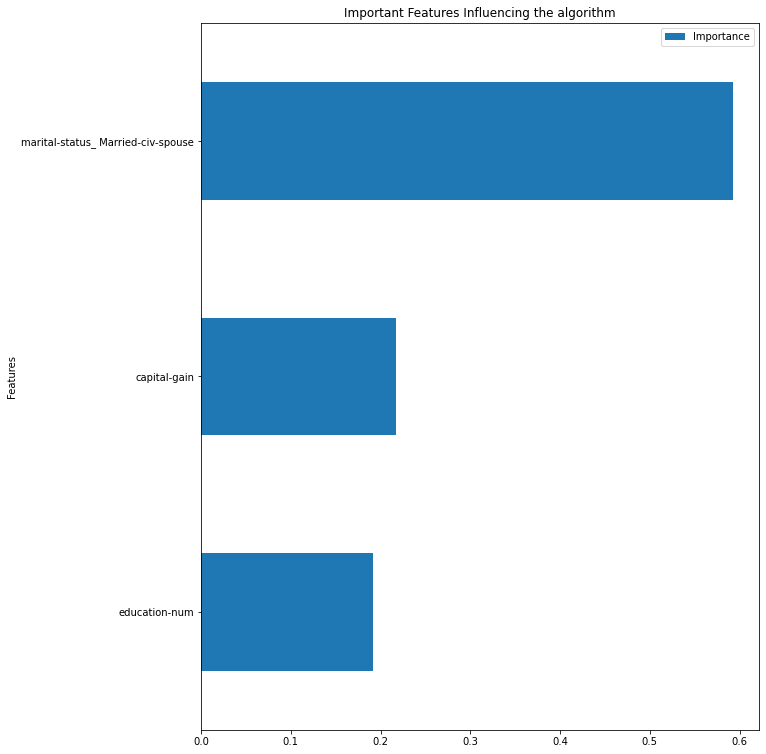

In [36]:
plot_df = pd.DataFrame(
    dict(Features=X.columns, Importance=clf_data_2.feature_importances_),
    index=range(len(clf_data_2.feature_importances_))
).sort_values('Importance', ascending=True).set_index('Features')

plot_df[plot_df.values > 0].plot(kind='barh', figsize=(10,13), title= 'Important Features Influencing the algorithm');

## Using the nearest k-NN algorithm

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
#measuring accuracy of the model
print(accuracy_score(Y_test,y_pred))

0.8484569322892677


In [41]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4942
           1       0.70      0.65      0.68      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [42]:
pd.DataFrame(y_pred).value_counts()

0    5041
1    1472
dtype: int64

In [43]:
pd.DataFrame(Y_test).value_counts()

the_label
0            4942
1            1571
dtype: int64

## Using Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
classifiers = LogisticRegression(random_state = 0, max_iter=2000, class_weight = 'balanced')
classifiers.fit(X_train,Y_train)
Y_prediction = classifiers.predict(X_test)
print(accuracy_score(Y_test,Y_prediction))

0.8079226163058498


In [46]:
#printing the classification report
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4942
           1       0.57      0.85      0.68      1571

    accuracy                           0.81      6513
   macro avg       0.76      0.82      0.77      6513
weighted avg       0.85      0.81      0.82      6513



In [47]:
feat_imp=pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': classifiers.coef_[0]}).sort_values('Importance', ascending=False)
feat_imp

,Attribute,Importance
48,relationship_ Wife,1.192409
23,marital-status_ Married-civ-spouse,0.716631
15,education_ Doctorate,0.659754
32,job_ Exec-managerial,0.633172
19,education_ Prof-school,0.621949
41,job_ Tech-support,0.581658
39,job_ Protective-serv,0.402578
38,job_ Prof-specialty,0.348189
17,education_ Masters,0.306687
40,job_ Sales,0.176702


<AxesSubplot:title={'center':'Feature Importance for Logistic Regression'}, ylabel='Attribute/Feature'>

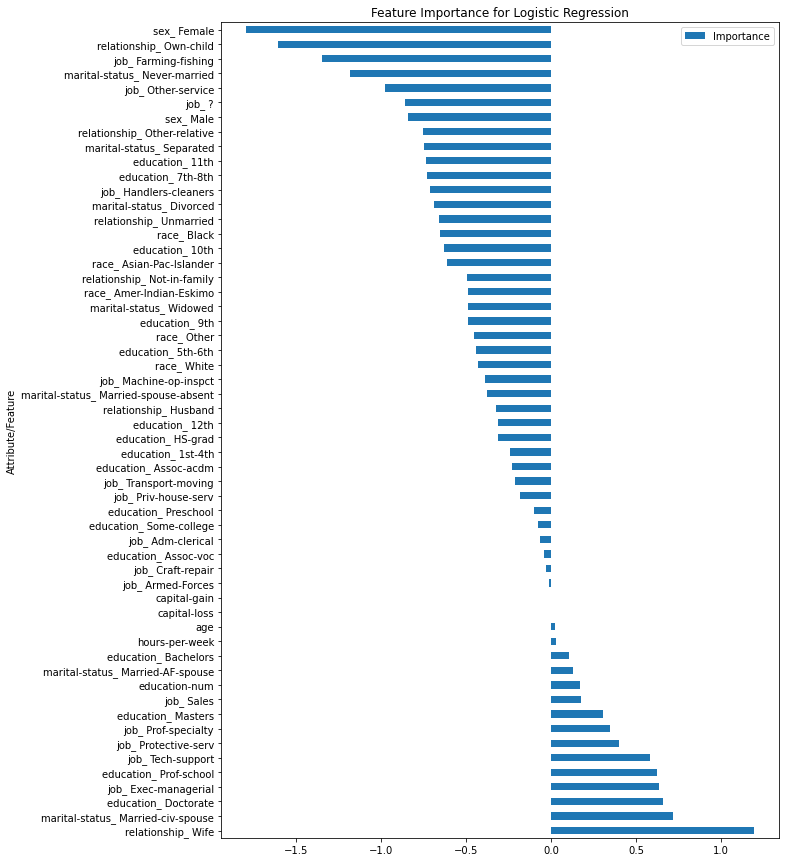

In [48]:
feat_imp.plot(x='Attribute', y='Importance',kind='barh', figsize=(10,15),
              title='Feature Importance for Logistic Regression', ylabel='Importance',
              xlabel ='Attribute/Feature' )

In [49]:
#printing the top 15 important features of the model
feat_imp_15 = feat_imp.head(15)
feat_imp_15

,Attribute,Importance
48,relationship_ Wife,1.192409
23,marital-status_ Married-civ-spouse,0.716631
15,education_ Doctorate,0.659754
32,job_ Exec-managerial,0.633172
19,education_ Prof-school,0.621949
41,job_ Tech-support,0.581658
39,job_ Protective-serv,0.402578
38,job_ Prof-specialty,0.348189
17,education_ Masters,0.306687
40,job_ Sales,0.176702


<AxesSubplot:title={'center':'Top 15 Feature Importance using Logistic Regression'}, ylabel='Attribute/Feature'>

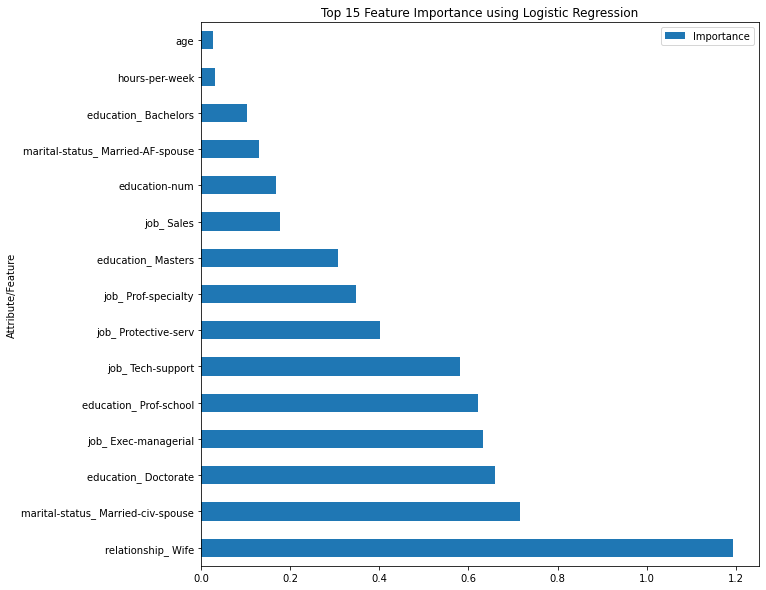

In [95]:
feat_imp_15.plot(x='Attribute', y='Importance',kind='barh', figsize=(10,10),
                title='Top 15 Feature Importance using Logistic Regression', ylabel='Importance',
                xlabel ='Attribute/Feature')